In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('../dataset/penguins.csv')

# Check for missing values
# print(df.isnull().sum())

# Drop missing values
df = df.dropna().reset_index(drop=True)

selected_features = ["culmen_length_mm", "culmen_depth_mm"]
df = df[selected_features]

df_sample = df.sample(n=100, random_state=42).reset_index(drop=True)

df_sample.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

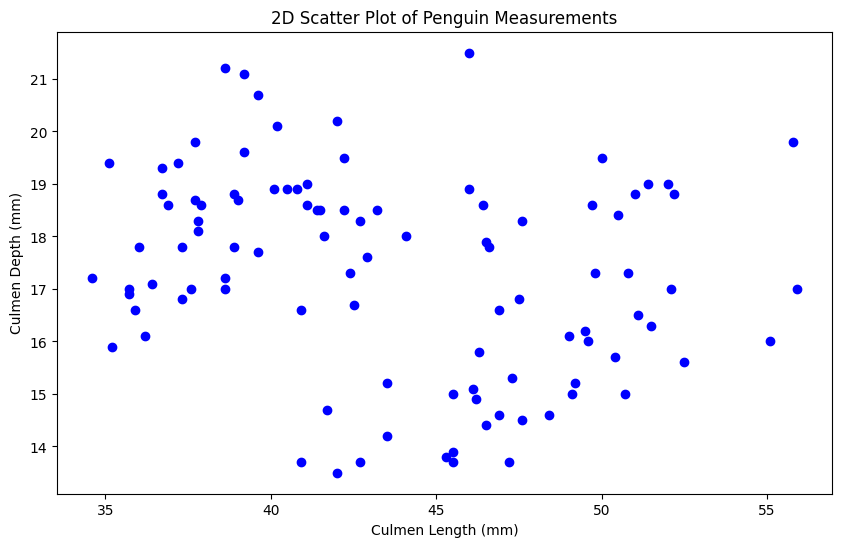

In [28]:
# Plotting the 2D scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_sample['culmen_length_mm'], df_sample['culmen_depth_mm'], c='blue', marker='o')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('2D Scatter Plot of Penguin Measurements')

plt.show()

In [6]:
data = df_sample[['culmen_length_mm', 'culmen_depth_mm']].values
print(data)

[[40.5 18.9]
 [39.6 20.7]
 [42.9 17.6]
 [49.8 17.3]
 [37.6 17. ]
 [49.6 16. ]
 [47.5 16.8]
 [49.7 18.6]
 [45.3 13.8]
 [51.4 19. ]
 [37.2 19.4]
 [38.6 21.2]
 [45.5 15. ]
 [49.1 15. ]
 [52.  19. ]
 [52.2 18.8]
 [34.6 17.2]
 [41.7 14.7]
 [36.7 18.8]
 [43.5 15.2]
 [38.6 17. ]
 [46.3 15.8]
 [36.  17.8]
 [51.5 16.3]
 [38.9 17.8]
 [46.5 17.9]
 [35.9 16.6]
 [41.1 18.6]
 [37.3 16.8]
 [38.6 17.2]
 [43.2 18.5]
 [50.7 15. ]
 [36.7 19.3]
 [40.9 13.7]
 [47.6 14.5]
 [46.9 14.6]
 [47.6 18.3]
 [52.1 17. ]
 [39.  18.7]
 [48.4 14.6]
 [42.2 18.5]
 [41.1 19. ]
 [50.5 18.4]
 [44.1 18. ]
 [47.2 13.7]
 [40.1 18.9]
 [36.2 16.1]
 [42.5 16.7]
 [39.6 17.7]
 [46.9 16.6]
 [55.9 17. ]
 [46.4 18.6]
 [40.8 18.9]
 [46.6 17.8]
 [45.5 13.9]
 [37.8 18.3]
 [36.9 18.6]
 [40.2 20.1]
 [42.  20.2]
 [35.7 16.9]
 [42.7 18.3]
 [38.9 18.8]
 [50.8 17.3]
 [52.5 15.6]
 [37.7 19.8]
 [35.1 19.4]
 [47.3 15.3]
 [41.6 18. ]
 [49.  16.1]
 [51.  18.8]
 [49.5 16.2]
 [37.7 18.7]
 [37.9 18.6]
 [42.4 17.3]
 [45.5 13.7]
 [46.1 15.1]
 [46.2 14.9]

In [12]:
def initialize_centroids(data, k):
    """Randomly initialize centroids."""
    indices = np.random.choice(data.shape[0], k, replace=False)
    return data[indices]

def assign_clusters(data, centroids):
    """Assign each data point to the nearest centroid."""
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, k):
    """Update centroids as the mean of assigned data points."""
    """(x, y) = """
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def compute_wcss(data, labels, centroids):
    """Compute the Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for i in range(len(centroids)):
        wcss += np.sum((data[labels == i] - centroids[i]) ** 2)
    return wcss

def kmeans(data, k, max_iters=100, tol=1e-4):
    """K-Means clustering algorithm."""
    centroids = initialize_centroids(data, k)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, k)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return centroids, labels

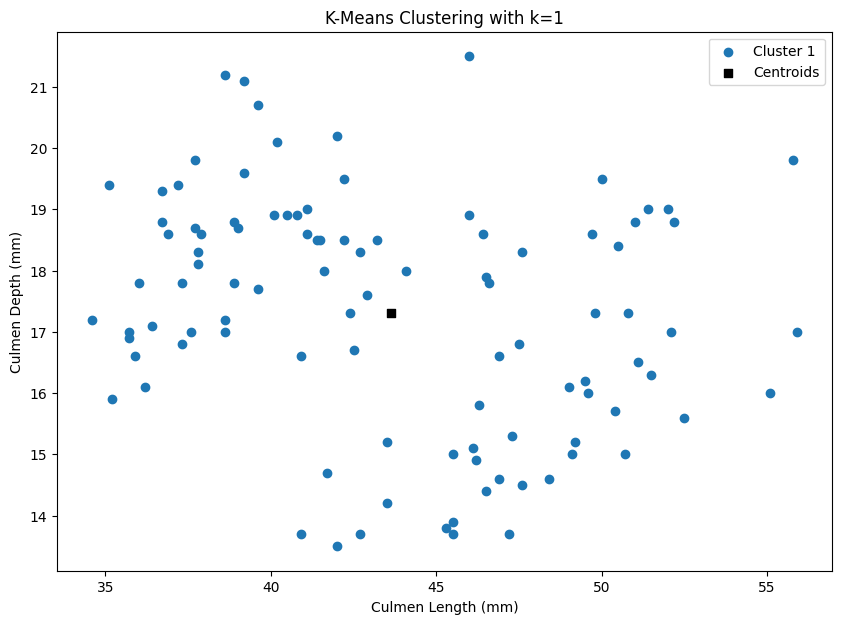

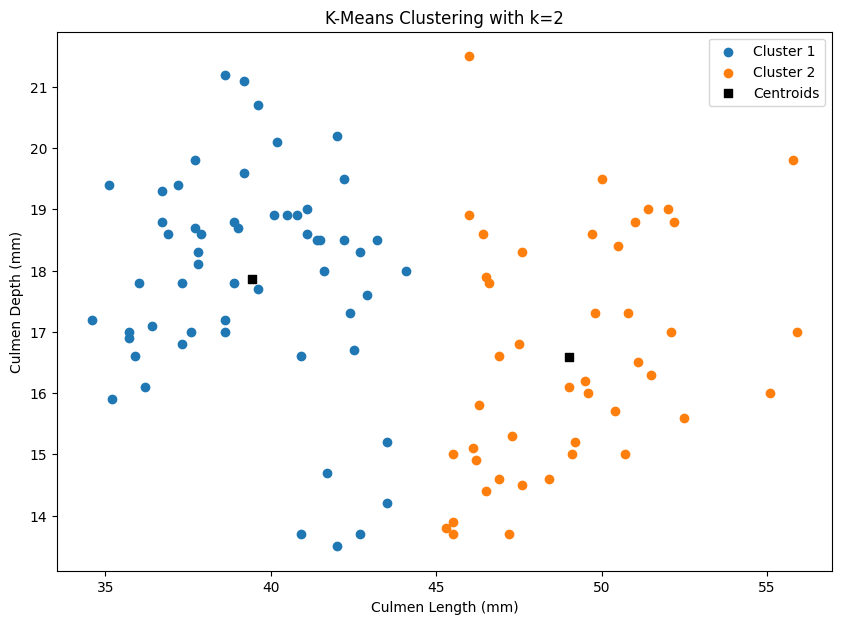

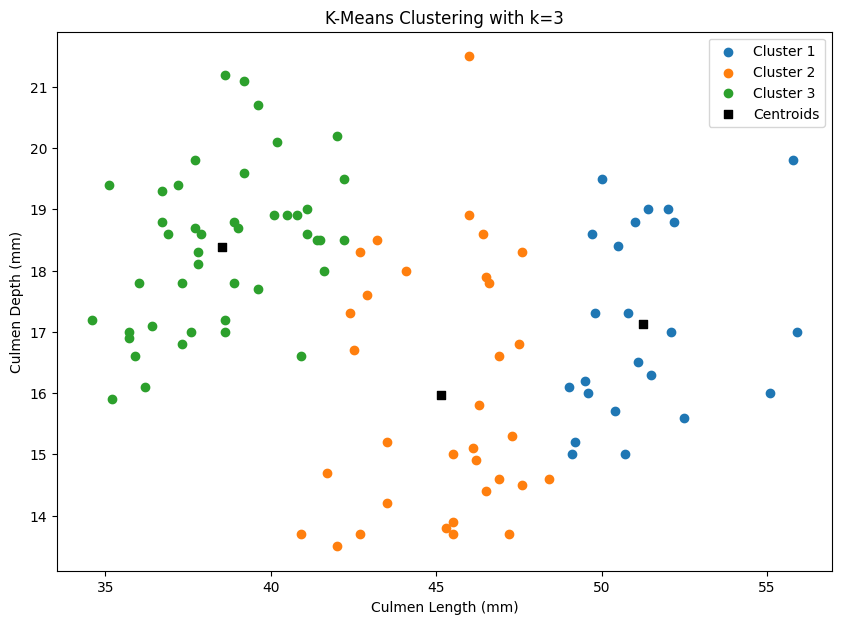

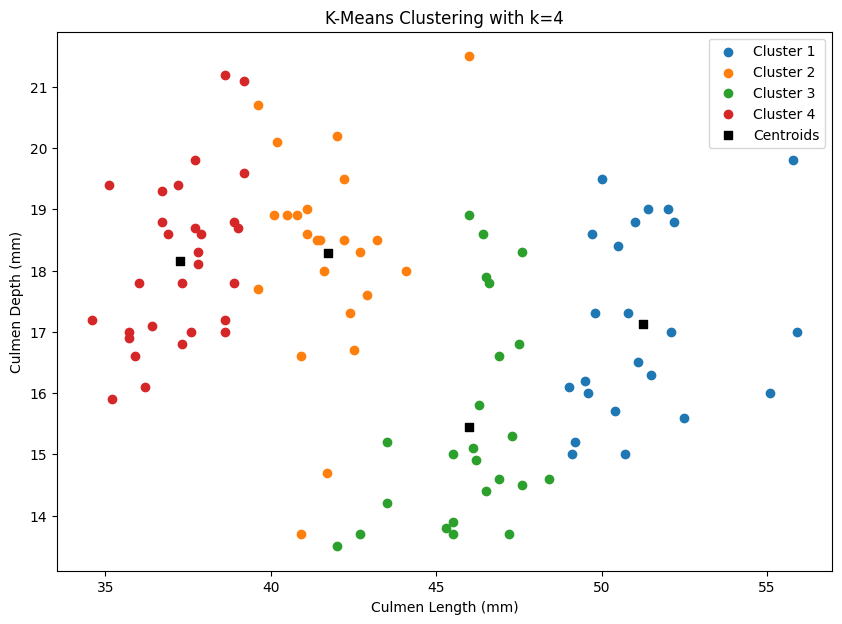

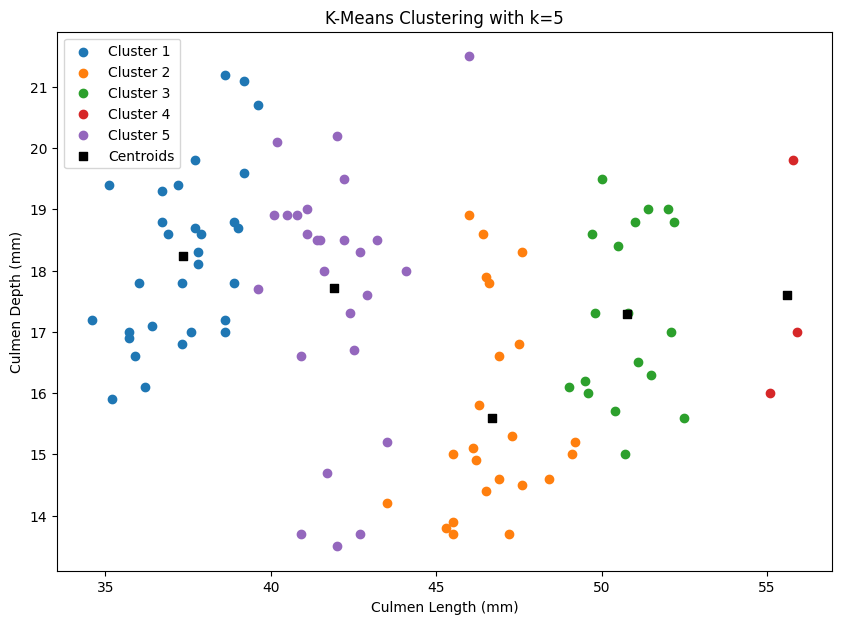

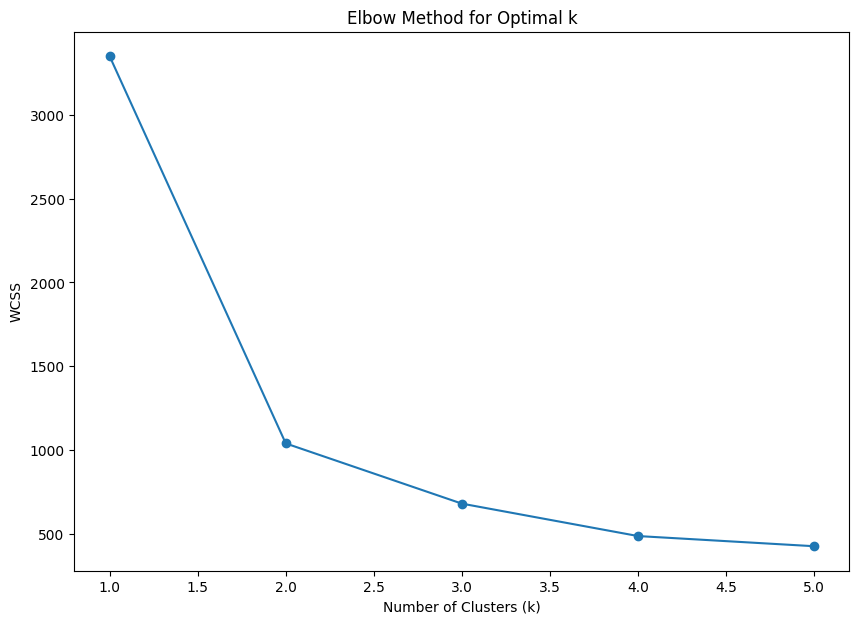

In [25]:
# Parameters
max_k = 5  # Maximum number of clusters to test
wcss = []

# Run K-Means for different values of k and compute WCSS
for k in range(1, max_k + 1):
    centroids, labels, centroids_history = kmeans(data, k)
    wcss.append(compute_wcss(data, labels, centroids))
    
    # Plotting the scatter plot for each k
    plt.figure(figsize=(10, 7))
    for i in range(k):
        plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', label='Centroids', marker='s')
    plt.xlabel('Culmen Length (mm)')
    plt.ylabel('Culmen Depth (mm)')
    plt.title(f'K-Means Clustering with k={k}')
    plt.legend()
    plt.show()

# Plotting the elbow method
plt.figure(figsize=(10, 7))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

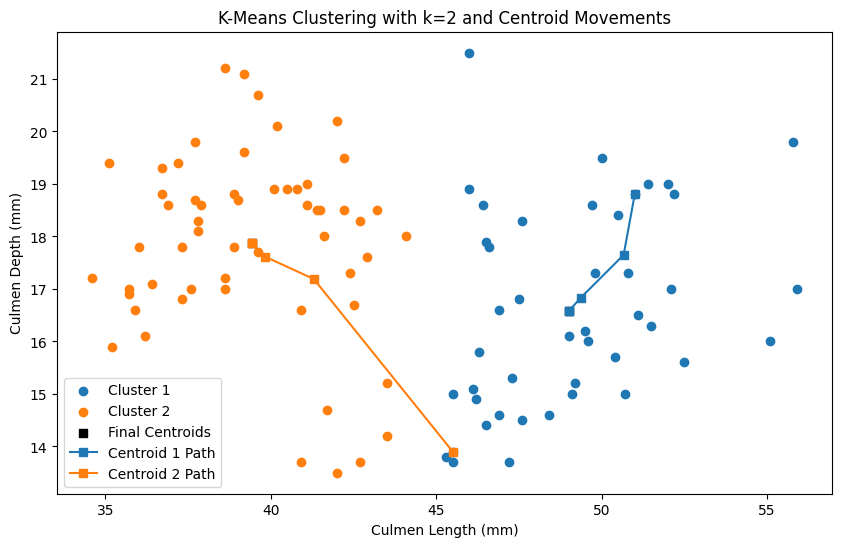

In [26]:
# Parameters
k = 2  # Number of clusters

# Run K-Means
centroids, labels, centroids_history = kmeans(data, k)

# Plotting the results
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', label='Final Centroids', marker='s')

# Plotting the movement of centroids
for i in range(k):
    centroid_path = np.array([c[i] for c in centroids_history])
    plt.plot(centroid_path[:, 0], centroid_path[:, 1], marker='s', linestyle='-', label=f'Centroid {i+1} Path')

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('K-Means Clustering with k=2 and Centroid Movements')
plt.legend()
plt.show()